# Classification Analysis: 
## Implementation of Support Vector Machines (SVM) for classifying images of hand-written digits into their respective numerical classes (0 to 9) 

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Load the MNIST dataset (digits)
digits = datasets.load_digits()

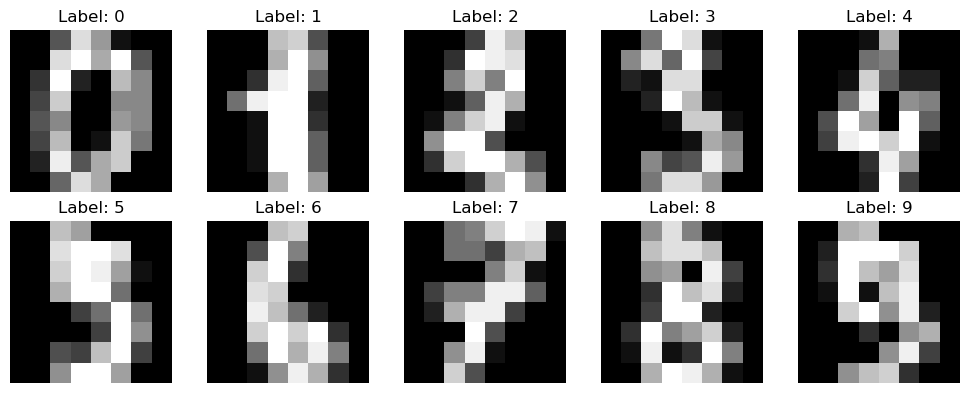

In [9]:
# Display some sample images and their labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [11]:
# Split dataset into features (X) and labels (y)
X, y = digits.data, digits.target

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Create an SVM model (with RBF kernel)
svm_model = SVC(kernel='rbf', C=10, gamma=0.001)

In [16]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [17]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [18]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  0  0  0  2 38]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.94      0.97      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       

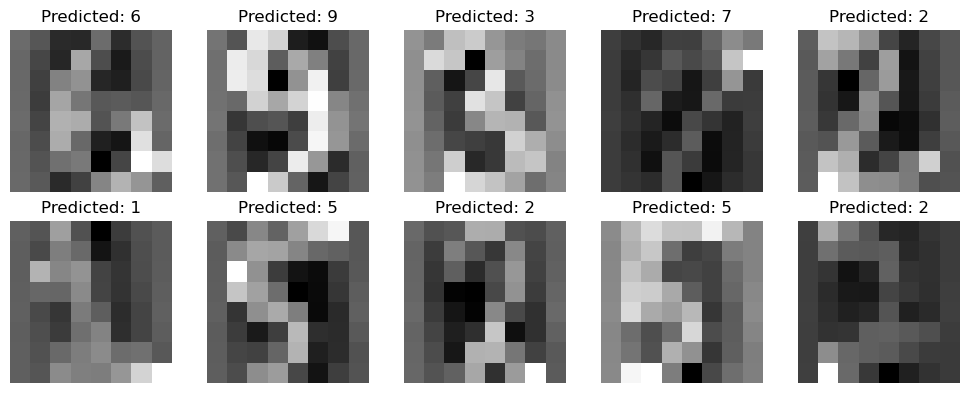

In [19]:
# Visualize some predictions
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()